# This notebook is going to attempt to review coffee intake vs sleep

In [1]:
import pandas as pd 

# First, get a sleep per night.
Note that creationDate is constant for one sleep, e.g. night before + this morning, so each night can be found by grouping by creationDate

In [130]:
from src.feature_helpers import get_sleep_df
df = get_sleep_df()
data = []
for name, group in df.groupby('creationDate'):
    d = group.endDate.max() - group.startDate.min()
    data.append([name, d.seconds / 3600])
hours_slept_df = pd.DataFrame(data=data, columns=['date','hours'])
hours_slept_df

,date,hours
0,2022-10-30 07:30:29+13:00,8.450000
1,2022-10-30 08:24:35+13:00,9.815833
2,2022-10-31 08:00:09+13:00,7.883333
3,2022-10-31 08:08:25+13:00,8.491667
4,2022-11-01 07:57:03+13:00,9.275000
...,...,...
163,2023-02-03 07:51:07+13:00,8.466667
164,2023-02-04 07:00:03+13:00,6.180000
165,2023-02-04 08:56:08+13:00,7.675000
166,2023-02-06 07:00:02+13:00,8.545000


In [198]:
hours_slept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                                
---  ------  --------------  -----                                
 0   date    168 non-null    datetime64[ns, pytz.FixedOffset(780)]
 1   hours   168 non-null    float64                              
dtypes: datetime64[ns, pytz.FixedOffset(780)](1), float64(1)
memory usage: 2.8 KB


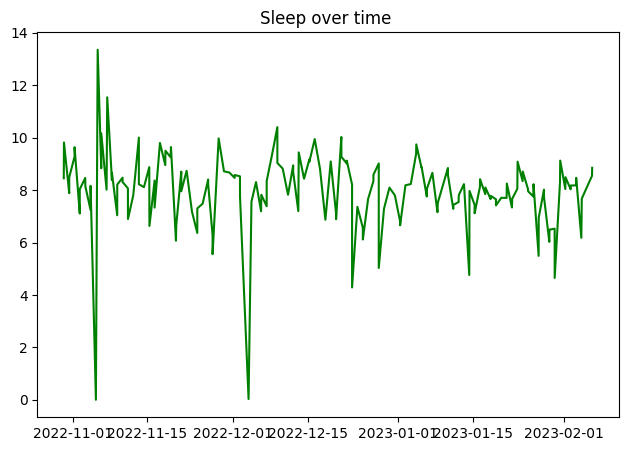

In [138]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5,5))
ax.plot(hours_slept_df['date'], hours_slept_df['hours'], color='green')
# ax.plot([])
ax.set_title('Sleep over time ')
plt.show()

In [139]:
hours_slept_df['hours'].describe()

count    168.000000
mean       7.983500
std        1.463064
min        0.005278
25%        7.429167
50%        8.141667
75%        8.705000
max       13.350000
Name: hours, dtype: float64

# Quick look over 'my data which holdscoffee data'

In [208]:
mydata = pd.read_csv('../data/mydata_googledrive.csv')
mydata

,counter,date,Annabel,sert,mood (1-5),vape,alcohol,caffinee,weight,bristol (7 = liquid),Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,24/10/2022,y,150.0,NaN,n,-,NaN,NaN,NaN,NaN,mood,NaN
1,1,25/10/2022,y,150.0,NaN,n,-,NaN,NaN,NaN,NaN,1,terrible day
2,1,26/10/2022,y,150.0,NaN,n,-,NaN,NaN,NaN,NaN,2,worse than good
3,1,27/10/2022,n,125.0,NaN,n,-,NaN,NaN,NaN,NaN,3,medium
4,1,28/10/2022,y,125.0,NaN,n,-,NaN,NaN,NaN,NaN,4,better than bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1,20/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,1,21/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,1,22/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,1,23/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
mydata = mydata.drop(columns=[x for x in mydata.columns if x != 'date' and x != 'caffinee'])

In [210]:
mydata

,date,caffinee
0,24/10/2022,NaN
1,25/10/2022,NaN
2,26/10/2022,NaN
3,27/10/2022,NaN
4,28/10/2022,NaN
...,...,...
208,20/05/2023,NaN
209,21/05/2023,NaN
210,22/05/2023,NaN
211,23/05/2023,NaN


In [217]:
# target = pd.to_datetime('2022-12-12', unit="ns", utc=True)

mydata['date'] = pd.to_datetime(mydata['date'], unit="ns", utc=True, dayfirst=True)
mydata

/tmp/ipykernel_70994/1028124603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['date'] = pd.to_datetime(mydata['date'], unit="ns", utc=True, dayfirst=True)


,date,caffinee
29,2022-11-22 00:00:00+00:00,2
30,2022-11-23 00:00:00+00:00,2
31,2022-11-24 00:00:00+00:00,2
32,2022-11-25 00:00:00+00:00,3
33,2022-11-26 00:00:00+00:00,1
...,...,...
100,2023-01-02 00:00:00+00:00,2
101,2023-02-02 00:00:00+00:00,2
102,2023-03-02 00:00:00+00:00,2
103,2023-04-02 00:00:00+00:00,2


In [213]:
mydata = mydata[(mydata['caffinee'].notna()) & (mydata['caffinee'] != '-')]
#mydata.caffinee = mydata.caffinee.astype('int')
mydata

,date,caffinee
29,2022-11-22 00:00:00+00:00,2
30,2022-11-23 00:00:00+00:00,2
31,2022-11-24 00:00:00+00:00,2
32,2022-11-25 00:00:00+00:00,3
33,2022-11-26 00:00:00+00:00,1
...,...,...
100,2023-01-02 00:00:00+00:00,2
101,2023-02-02 00:00:00+00:00,2
102,2023-03-02 00:00:00+00:00,2
103,2023-04-02 00:00:00+00:00,2


In [214]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 29 to 104
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      66 non-null     datetime64[ns, UTC]
 1   caffinee  66 non-null     object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 1.5+ KB


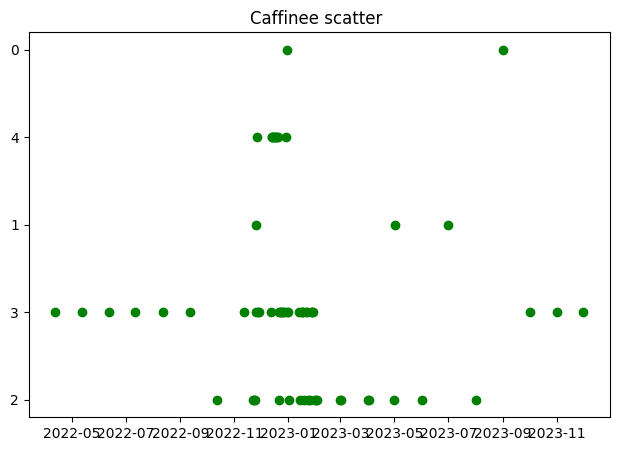

In [215]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5,5))
ax.scatter(mydata['date'], mydata['caffinee'], color='green')
ax.set_title('Caffinee scatter ')
plt.show()

# Now lets look at doing a merge, then drop nan then run a regression

In [222]:
hours_slept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                                
---  ------  --------------  -----                                
 0   date    168 non-null    datetime64[ns, pytz.FixedOffset(780)]
 1   hours   168 non-null    float64                              
dtypes: datetime64[ns, pytz.FixedOffset(780)](1), float64(1)
memory usage: 2.8 KB


In [224]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 29 to 104
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      66 non-null     datetime64[ns, UTC]
 1   caffinee  66 non-null     object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 1.5+ KB


In [226]:
# hours_slept_df, mydata

join = mydata.merge(hours_slept_df, left_on='date', right_on='date') #, on='date', how='outer')
join

,date,caffinee,hours


In [230]:
hours_slept_df.columns

Index(['date', 'hours'], dtype='object')

In [231]:
mydata.columns

Index(['date', 'caffinee'], dtype='object')